In [15]:
%load_ext autoreload
%autoreload 2
import diffusers
from diffusers import StableDiffusionPipeline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
pipeline = StableDiffusionPipeline.from_pretrained("models/t2i/").to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [22]:
images = pipeline(["gs as ps"]*16, height=256, width=256, num_inference_steps=100)[0]
images = [image.convert("L") for image in images]

  0%|          | 0/100 [00:00<?, ?it/s]

In [23]:
def plot_images(images):
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))

    # Plot each image in the grid
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i], cmap='gray')
        ax.axis('off')

    plt.tight_layout()
    plt.show()

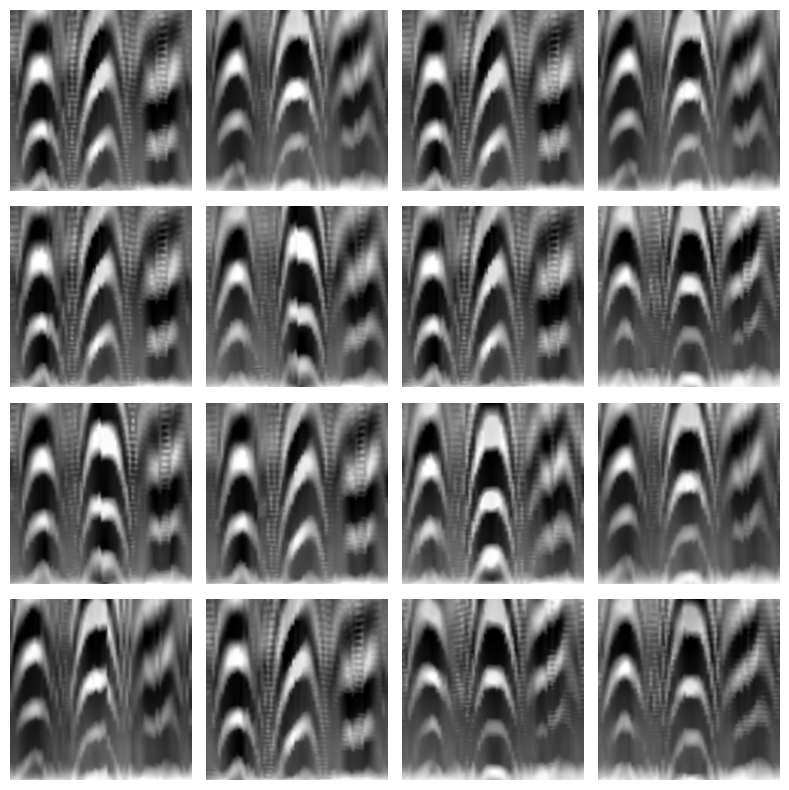

In [24]:
plot_images(images)